# Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
np.random.seed(42)

iris = load_iris()
X = iris.data
y = iris.target
print("Iris Dataset Check:")
print(f"Samples: {X.shape[0]}, Features: {X.shape[1]}, Classes: {np.unique(y)}")
print(f"Missing values: {np.isnan(X).sum()}")
print(f"Basic statistics:\n{pd.DataFrame(X, columns=iris.feature_names).describe()}")

Iris Dataset Check:
Samples: 150, Features: 4, Classes: [0 1 2]
Missing values: 0
Basic statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# One-hot encoding for labels
def to_one_hot(y, num_classes=3):
    return np.eye(num_classes)[y]

y_train_onehot = to_one_hot(y_train)
y_val_onehot = to_one_hot(y_val)
y_test_onehot = to_one_hot(y_test)

In [ ]:
class LogisticRegression:
    def __init__(self, input_size, num_classes, learning_rate=0.1, n_iterations=1000):
        self.input_size = input_size
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.W = np.random.randn(input_size, num_classes) * 0.01
        self.b = np.zeros((1, num_classes))
        self.loss_history = []
        self.val_loss_history = []

    def softmax(self, z):
        exp_scores = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def forward(self, X):
        z = np.dot(X, self.W) + self.b
        y_pred = self.softmax(z)
        return y_pred

    def compute_loss(self, y_pred, y_true):
        m = y_true.shape[0]
        log_likelihood = -np.log(np.sum(y_pred * y_true, axis=1))
        loss = np.sum(log_likelihood) / m
        return loss

    def compute_gradients(self, X, y_true, y_pred):
        m = X.shape[0]
        dZ = y_pred - y_true
        dW = np.dot(X.T, dZ) / m
        db = np.sum(dZ, axis=0, keepdims=True) / m
        return dW, db

    def update_parameters(self, dW, db):
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

    def fit(self, X, y, X_val=None, y_val=None):
        for i in range(self.n_iterations):
            y_pred = self.forward(X)
            loss = self.compute_loss(y_pred, y)
            self.loss_history.append(loss)
            if X_val is not None and y_val is not None:
                y_val_pred = self.forward(X_val)
                val_loss = self.compute_loss(y_val_pred, y_val)
                self.val_loss_history.append(val_loss)
            dW, db = self.compute_gradients(X, y, y_pred)
            self.update_parameters(dW, db)
            if (i + 1) % 100 == 0:
                print(f"Iteration {i + 1}/{self.n_iterations}, Loss: {loss:.4f}")

    def predict(self, X):
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)

In [ ]:
# Train model
model = LogisticRegression(input_size=X_train.shape[1], num_classes=3, learning_rate=0.1, n_iterations=1000)
model.fit(X_train, y_train_onehot, X_val, y_val_onehot)

Iteration 100/1000, Loss: 0.3293
Iteration 200/1000, Loss: 0.2598
Iteration 300/1000, Loss: 0.2188
Iteration 400/1000, Loss: 0.1907
Iteration 500/1000, Loss: 0.1702
Iteration 600/1000, Loss: 0.1545
Iteration 700/1000, Loss: 0.1420
Iteration 800/1000, Loss: 0.1320
Iteration 900/1000, Loss: 0.1236
Iteration 1000/1000, Loss: 0.1166


In [ ]:
# Evaluate
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

print("\nLogistic Regression Performance:")
print(f"Training Accuracy: {accuracy(y_train, y_train_pred):.4f}")
print(f"Validation Accuracy: {accuracy(y_val, y_val_pred):.4f}")
print(f"Test Accuracy: {accuracy(y_test, y_test_pred):.4f}")


Logistic Regression Performance:
Training Accuracy: 0.9792
Validation Accuracy: 0.9167
Test Accuracy: 0.9667


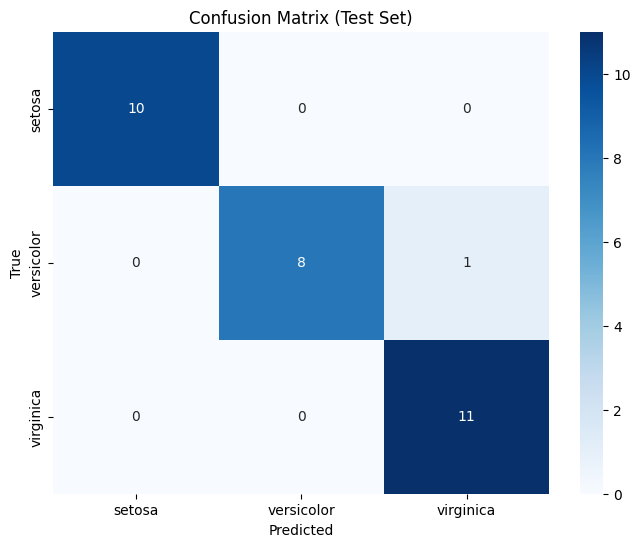

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))


Classification Report (Test Set):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
# Cross-validation using sklearn for simplicity
from sklearn.linear_model import LogisticRegression
sklearn_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
scores = cross_val_score(sklearn_model, X, y, cv=5, scoring='accuracy')
print("\n5-fold Cross-Validation Results:")
print(f"Accuracy per fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


5-fold Cross-Validation Results:
Accuracy per fold: [0.96666667 1.         0.93333333 0.9        1.        ]
Mean Accuracy: 0.9600 ± 0.0389


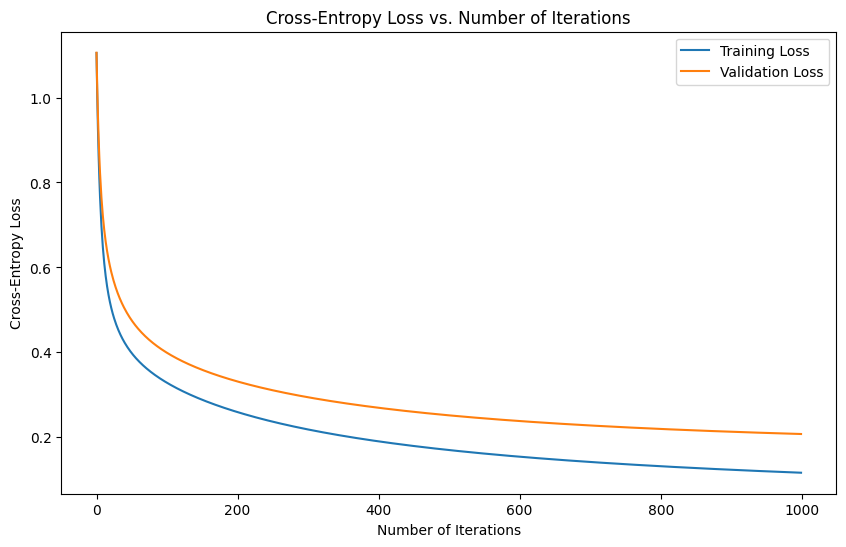

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(model.loss_history, label='Training Loss')
plt.plot(model.val_loss_history, label='Validation Loss')
plt.title('Cross-Entropy Loss vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Cross-Entropy Loss')
plt.legend()
plt.show()

In [ ]:
print(f"Final Training Loss: {model.loss_history[-1]:.4f}")
print(f"Final Validation Loss: {model.val_loss_history[-1]:.4f}")

Final Training Loss: 0.1166
Final Validation Loss: 0.2078


# Multi-Layer Perceptron (MLP)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
np.random.seed(42)

data = fetch_california_housing()
X = data.data
y = data.target

print("Dataset Summary:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature names: {data.feature_names}")
print(f"Target range (min, max): ({np.min(y):.2f}, {np.max(y):.2f})")
print(f"Mean target value: {np.mean(y):.2f}")
print("\nBasic Statistics of Features (before standardization):")
stats = pd.DataFrame(X, columns=data.feature_names).describe()
print(stats)
print("\nFirst 5 samples:")
print(pd.DataFrame(np.column_stack((X[:5], y[:5])), columns=data.feature_names + ['MedianHouseValue']))

Dataset Summary:
Number of samples: 20640
Number of features: 8
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target range (min, max): (0.15, 5.00)
Mean target value: 2.07

Basic Statistics of Features (before standardization):
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000

In [ ]:
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

print("\nFeature Standardization Summary:")
print(f"Mean after scaling: {np.mean(X_scaled, axis=0)}")
print(f"Std after scaling: {np.std(X_scaled, axis=0)}")
print("\nTarget Standardization Summary:")
print(f"Mean after scaling: {np.mean(y_scaled):.4f}")
print(f"Std after scaling: {np.std(y_scaled):.4f}")


Feature Standardization Summary:
Mean after scaling: [ 6.60969987e-17  5.50808322e-18  6.60969987e-17 -1.06030602e-16
 -1.10161664e-17  3.44255201e-18 -1.07958431e-15 -8.52651283e-15]
Std after scaling: [1. 1. 1. 1. 1. 1. 1. 1.]

Target Standardization Summary:
Mean after scaling: 0.0000
Std after scaling: 1.0000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("\nData Split Summary:")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Data Split Summary:
Training set size: 13209 samples
Validation set size: 3303 samples
Test set size: 4128 samples


In [ ]:
class MLP:
    def __init__(self, layer_sizes, learning_rate=0.001, n_iterations=1000):
        """
        Initialize the MLP network for regression

        Parameters:
        layer_sizes: list of sizes for each layer (input, hidden, output)
        learning_rate: learning rate
        n_iterations: number of training iterations
        """
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.parameters = {}
        self.loss_history = []
        self.val_loss_history = []
        self.initialize_parameters()
        print("\nMLP Model Configuration:")
        print(f"Layer sizes: {layer_sizes}")
        print(f"Learning rate: {learning_rate}")
        print(f"Number of iterations: {n_iterations}")

    def initialize_parameters(self):
        for l in range(1, len(self.layer_sizes)):
            # He initialization for ReLU
            self.parameters[f'W{l}'] = np.random.randn(self.layer_sizes[l], self.layer_sizes[l-1]) * np.sqrt(2 / self.layer_sizes[l-1])
            self.parameters[f'b{l}'] = np.zeros((self.layer_sizes[l], 1))
        print("Parameters initialized with He initialization.")

    def relu(self, Z):
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        return Z > 0

    def forward_propagation(self, X):
        caches = {}
        A = X.T
        caches['A0'] = A

        # Forward propagation through hidden layers - using ReLU
        for l in range(1, len(self.layer_sizes)-1):
            Z = np.dot(self.parameters[f'W{l}'], A) + self.parameters[f'b{l}']
            A = self.relu(Z)
            caches[f'Z{l}'] = Z
            caches[f'A{l}'] = A

        # Output layer - linear activation (no activation) for regression
        Z = np.dot(self.parameters[f'W{len(self.layer_sizes)-1}'], A) + self.parameters[f'b{len(self.layer_sizes)-1}']
        A = Z  # No activation function
        caches[f'Z{len(self.layer_sizes)-1}'] = Z
        caches[f'A{len(self.layer_sizes)-1}'] = A

        return A, caches

    def compute_cost(self, AL, Y):

        m = Y.shape[0]
        # MSE = (1/2m) * Σ(y_pred - y_true)^2
        cost = (1 / (2 * m)) * np.sum(np.square(AL.T - Y.reshape(-1, 1)))
        return cost

    def backward_propagation(self, Y, caches):

        grads = {}
        L = len(self.layer_sizes) - 1
        m = Y.shape[0]
        Y = Y.reshape(-1, 1)

        # Gradient at the output layer (MSE Loss)
        dZ = caches[f'A{L}'].T - Y
        dW = (1/m) * np.dot(dZ.T, caches[f'A{L-1}'].T)
        db = (1/m) * np.sum(dZ, axis=0, keepdims=True).T
        grads[f'dW{L}'] = dW
        grads[f'db{L}'] = db

        # Backward propagation through hidden layers
        for l in reversed(range(1, L)):
            dA = np.dot(self.parameters[f'W{l+1}'].T, dZ.T)
            dZ = dA * self.relu_derivative(caches[f'Z{l}'])
            dW = (1/m) * np.dot(dZ, caches[f'A{l-1}'].T)
            db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
            grads[f'dW{l}'] = dW
            grads[f'db{l}'] = db
            dZ = dA.T

        return grads

    def update_parameters(self, grads):
        for l in range(1, len(self.layer_sizes)):
            self.parameters[f'W{l}'] -= self.learning_rate * grads[f'dW{l}']
            self.parameters[f'b{l}'] -= self.learning_rate * grads[f'db{l}']

    def fit(self, X, Y, X_val=None, Y_val=None):
        for i in range(self.n_iterations):
            # Forward propagation
            AL, caches = self.forward_propagation(X)

            # Compute cost
            cost = self.compute_cost(AL, Y)

            # Backward propagation
            grads = self.backward_propagation(Y, caches)

            # Update parameters
            self.update_parameters(grads)

            # Store loss history
            self.loss_history.append(cost)

            # Compute validation loss if provided
            if X_val is not None and Y_val is not None:
                AL_val, _ = self.forward_propagation(X_val)
                val_loss = self.compute_cost(AL_val, Y_val)
                self.val_loss_history.append(val_loss)

            if (i + 1) % 100 == 0:
                print(f"Iteration {i + 1}/{self.n_iterations}, Training Loss: {cost:.6f}, "
                      f"Validation Loss: {val_loss:.6f}" if X_val is not None else "")

        return self

    def predict(self, X):
        AL, _ = self.forward_propagation(X)
        return AL.T.flatten()

In [ ]:
# Define network architecture
input_size = X_train.shape[1]
hidden_layer1 = 64
hidden_layer2 = 32
output_size = 1
layer_sizes = [input_size, hidden_layer1, hidden_layer2, output_size]

In [ ]:
# Initialize and train the model
mlp = MLP(layer_sizes=layer_sizes, learning_rate=0.001, n_iterations=1000)
mlp.fit(X_train, y_train, X_val, y_val)

Parameters initialized with He initialization.

MLP Model Configuration:
Layer sizes: [8, 64, 32, 1]
Learning rate: 0.001
Number of iterations: 1000
Iteration 100/1000, Training Loss: 0.578900, Validation Loss: 0.670824
Iteration 200/1000, Training Loss: 0.430246, Validation Loss: 0.473105
Iteration 300/1000, Training Loss: 0.366550, Validation Loss: 0.393270
Iteration 400/1000, Training Loss: 0.329642, Validation Loss: 0.349778
Iteration 500/1000, Training Loss: 0.305098, Validation Loss: 0.322507
Iteration 600/1000, Training Loss: 0.287555, Validation Loss: 0.303673
Iteration 700/1000, Training Loss: 0.274305, Validation Loss: 0.289671
Iteration 800/1000, Training Loss: 0.263860, Validation Loss: 0.278635
Iteration 900/1000, Training Loss: 0.255343, Validation Loss: 0.269611
Iteration 1000/1000, Training Loss: 0.248230, Validation Loss: 0.262025


In [ ]:
# Predict
y_train_pred = mlp.predict(X_train)
y_val_pred = mlp.predict(X_val)
y_test_pred = mlp.predict(X_test)

In [ ]:
# Calculate MSE and MAE
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Evaluate model on scaled data
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"\nMLP Regression Model Performance (Scaled Data):")
print(f"Training MSE: {train_mse:.6f}")
print(f"Validation MSE: {val_mse:.6f}")
print(f"Test MSE: {test_mse:.6f}")


MLP Regression Model Performance (Scaled Data):
Training MSE: 0.496330
Validation MSE: 0.524050
Test MSE: 0.505131


In [ ]:
y_train_actual = scaler_y.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_train_pred_actual = scaler_y.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
y_val_actual = scaler_y.inverse_transform(y_val.reshape(-1, 1)).flatten()
y_val_pred_actual = scaler_y.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_test_pred_actual = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()

# Calculate MAE in USD
train_mae = mean_absolute_error(y_train_actual, y_train_pred_actual) * 100000
val_mae = mean_absolute_error(y_val_actual, y_val_pred_actual) * 100000
test_mae = mean_absolute_error(y_test_actual, y_test_pred_actual) * 100000

print(f"\nPerformance with Actual Values (in USD):")
print(f"Training Set - Mean Actual: {np.mean(y_train_actual) * 100000:.2f}, Mean Predicted: {np.mean(y_train_pred_actual) * 100000:.2f}")
print(f"Validation Set - Mean Actual: {np.mean(y_val_actual) * 100000:.2f}, Mean Predicted: {np.mean(y_val_pred_actual) * 100000:.2f}")
print(f"Test Set - Mean Actual: {np.mean(y_test_actual) * 100000:.2f}, Mean Predicted: {np.mean(y_test_pred_actual) * 100000:.2f}")
print(f"\nMean Absolute Error (MAE) in USD:")
print(f"Training MAE: {train_mae:.2f}")
print(f"Validation MAE: {val_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")


Performance with Actual Values (in USD):
Training Set - Mean Actual: 206691.73, Mean Predicted: 207527.02
Validation Set - Mean Actual: 209206.11, Mean Predicted: 209780.82
Test Set - Mean Actual: 205500.31, Mean Predicted: 206949.56

Mean Absolute Error (MAE) in USD:
Training MAE: 60687.37
Validation MAE: 61923.76
Test MAE: 61232.86


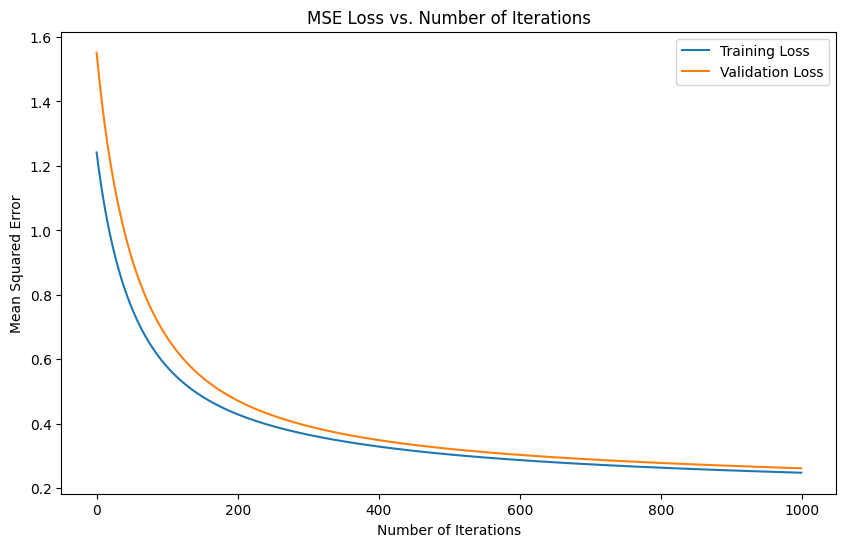

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_history, label='Training Loss')
plt.plot(mlp.val_loss_history, label='Validation Loss')
plt.title('MSE Loss vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

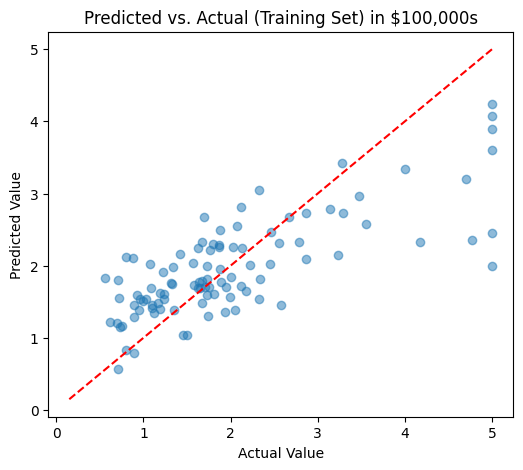

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(y_train_actual[:100], y_train_pred_actual[:100], alpha=0.5)
plt.plot([min(y_train_actual), max(y_train_actual)],
         [min(y_train_actual), max(y_train_actual)], 'r--')
plt.title('Predicted vs. Actual (Training Set) in $100,000s')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

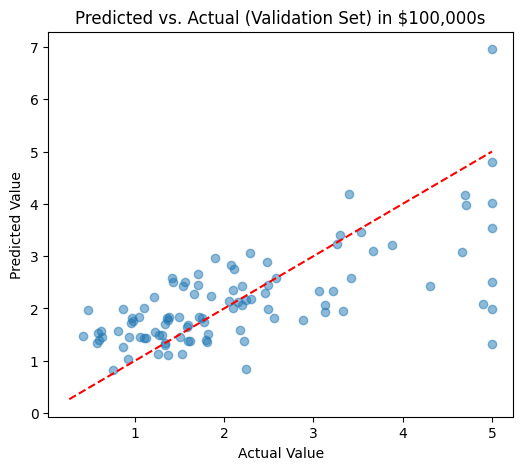

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(y_val_actual[:100], y_val_pred_actual[:100], alpha=0.5)
plt.plot([min(y_val_actual), max(y_val_actual)],
         [min(y_val_actual), max(y_val_actual)], 'r--')
plt.title('Predicted vs. Actual (Validation Set) in $100,000s')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()